In [ ]:
# Reading the dataset
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
# Defining input-output features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

# **Data Preprocessing**

In [ ]:
# Dummy encoding of output feature
y = pd.get_dummies(y).values
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [ ]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [ ]:
# Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(158, 13)
(158, 3)
(20, 13)
(20, 3)


# **Defining functions to be used**

In [ ]:
# Defining sigmoid activation function
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Defining function to calculate mean squared error
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

In [ ]:
# Defining function to calculate accuracy
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

# **Initiating Neural Network Model and Hyperparameters**

In [ ]:
# Initialize hyperparameters
learning_rate = 0.01
iterations = 5000
# Size of input layer
input_size = 13
# Size of hidden layer
hidden_size = 17
# Size of output layer
output_size = 3  
results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Initialize weights
np.random.seed(10)
# initializing weight for the hidden layer
weight_h = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
# initializing weight for the output layer
weight_o = np.random.normal(scale=0.5, size=(hidden_size , output_size))

# **Running the Backpropagation Algorithm**

Here we will start training the network, first will apply the input to the hidden layer and output at the hidden layer is obtained after applying the activation function. This same output is further propagated to the input of the actual output layer of the network where we again dot the product between the output of the hidden layer and the weights of the output layer.

After the dot product, we again apply the activation function to the output states of the network to make the prediction. Later we calculate the error between the actual values and the predicted values using MSE.

Based on the prediction and actual outputs we calculate the accuracy of the model for each iteration and for each iteration, we store the result into the dataframe. After that, we will calculate the error at each layer and the weights according to the actual outputs and finally, we will update the weights at each layer. 

This whole process is about one iteration and we are running this algorithm for 5000 iterations

In [ ]:
for itr in range(iterations):    
    # Net input to hidden layer
    input_h = np.dot(X_train, weight_h)
    # Activation (output) by hidden layer
    output_h = sigmoid(np.array(input_h, dtype=np.float128))
    # Net input to output layer
    input_o = np.dot(output_h, weight_o)
    # Activation (output) by output layer
    output_o = sigmoid(np.array(input_o, dtype=np.float128))
        
    # Calculating error between model output and actual output
    mse = mean_squared_error(output_o, y_train)
    # Calculating accuracy of model output
    acc = accuracy(output_o, y_train)
    # Saving results / performance in each iteration
    results = results.append({"MSE": mse, "Accuracy": acc},ignore_index=True )
    
    # Backpropagting error
    E1 = output_o - y_train
    dW1 = E1 * output_o * (1 - output_o)
    E2 = np.dot(dW1, weight_o.T)
    dW2 = E2 * output_h * (1 - output_h)
    # Calculating change in weight
    weight_o_update = np.dot(output_h.T, dW1) / y_train.size
    weight_h_update = np.dot(X_train.T, dW2) / y_train.size
    # Updating weights
    weight_o = weight_o - learning_rate * weight_o_update
    weight_h = weight_h - learning_rate * weight_h_update

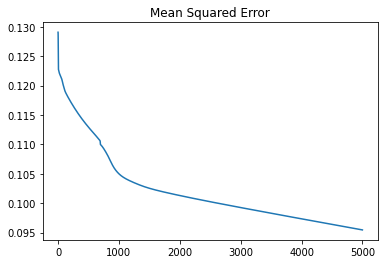

In [ ]:
import matplotlib.pyplot as plt
results.MSE.plot(title="Mean Squared Error")

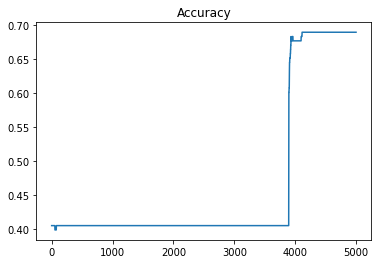

In [ ]:
results.Accuracy.plot(title="Accuracy")

In [ ]:
# Accuracy on test data using updated weights
input_h = np.dot(X_test, weight_h)
output_h = sigmoid(np.array(input_h, dtype=np.float128))
input_o = np.dot(output_h, weight_o)
output_o = sigmoid(np.array(input_o, dtype=np.float128))
acc = accuracy(output_o, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.7
